
<div style="text-align: center; padding: 30px 10px;">

<h1 style="color:#ff7500; font-size: 24px; margin-bottom: 10px;">
МФТИ ФПМИ
</h1>

<h2 style="font-size: 30px; margin-top: 5px;">
Практикум Python - Phys&Math Поток
</h2>

<hr style="width: 60%; border: 1px solid #10069f; margin: 25px auto;">

<h3 style="font-size: 36px;">
4. Numpy
</h3>

<p style="margin-top: 20px;">
<strong>Дата:</strong> 24-26 февраля 2026 года<br>
</p>

<p style="margin-top: 25px;">
Данный ноутбук является частью серии семинаров по курсу  
<em>«Практикум Python»</em> и предназначен для учебных и образовательных целей.
</p>

</div>

# 1. Что такое Numpy и для чего он нужен нам

**[NumPy]((http://www.numpy.org/))** (**Num**eric **Py**thon) — это open-source библиотека для Python, предназначенная для удобной и эффективной работы с многомерными массивами и матрицами. Она предоставляет мощные функции для математических операций, связанных с этими структурами.

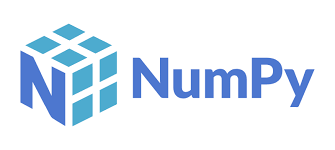

In [ ]:
import numpy as np

**Преимущества NumPy:**

- **Быстрее** - NumPy использует алгоритмы, написанные на C, которые работают *значительно быстрее* чем те, что написаны на Python.
- **Меньше циклов** - NumPy помогает уменьшить количество циклов в коде вашей программы, что мешает не запутаться в них.
- **Чище код** - без вложенных циклов ваш код больше будет намного чище и проще для чтения.
- **Better quality** - код библиотеки написан сообществом профессионалов, поэтому он оптимизирован, приятен в работе и не содержит багов.


По этим причинам NumPy является де-факто **стандартом для работы с многомерными массивами** в анализе данных. Многие популярные библиотеки в своем исходном коде используют NumPy.

# 2. Создание массивов

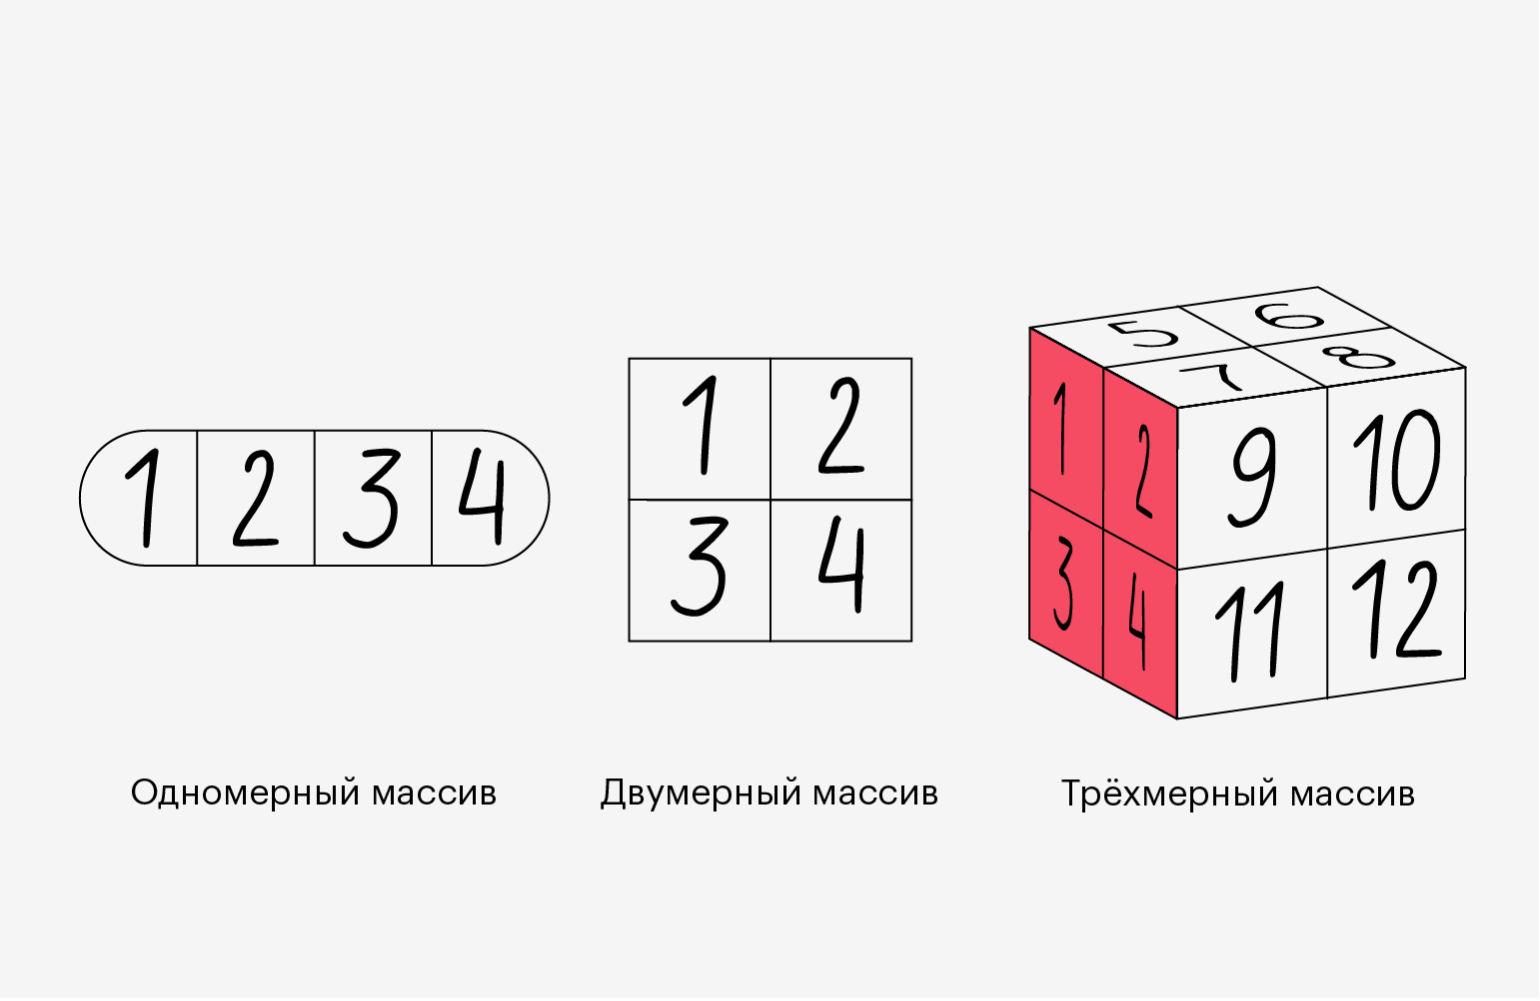

Основным объектом `NumPy` является *однородный* многомерный массив, в numpy он реализован через объект `ndarray`. Массивы (`ndarray`) похожи на списки (`list`), но могут хранить только элементы одного типа. Производить вычисления с массивами гораздо быстрее и эффективнее чем со списками.

In [ ]:
# Создаём массивы

# Вариант 1. Из списка Python (list)
a = np.array([1.7, 2, 3, 1, 0], dtype=np.int16) # в np есть базовые типы данных в т.ч. int
print(a)
a

[1 2 3 1 0]


array([1, 2, 3, 1, 0], dtype=int16)

In [ ]:
# n-мерный массив - список списков
b = np.array([[1, 8, 3],
              [3, 2, 3],
              [3, 5, 6]])
b

array([[1, 8, 3],
       [3, 2, 3],
       [3, 5, 6]])

In [ ]:
# Но размерность списков должна совпадать, иначе не получится такой трюк
c = np.array([[0],
              [1, 2]])
c

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
# Вариант 2. Заполним массив нулями

d = np.zeros(5)
d

array([0., 0., 0., 0., 0.])

In [ ]:
# Аналогично - n-мерные

e = np.zeros((3, 2))
e

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# Вариант 3. Заполненный единицами
f = np.ones((3, 2))
f

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

## Свойства массива

Заметим, что нам бы классн было знать свойства массивов, которые создаём. Давайте продолжим работу с f.

In [ ]:
# размерность массива. В случае двухмерного - сначала строки, потом столбцы
f.shape

(3, 2)

In [ ]:
# тип, который лежит в массиве
f.dtype

dtype('float64')

In [ ]:
# Все возможные свойства указаны тут
np.array?

Также мы умеем менять размер массива, сохраняя элементы, с помощью метода reshape

In [ ]:
g = np.array([1, 2, 3, 4, 5, 6])
print(g)

g.reshape((3, 2))

[1 2 3 4 5 6]


array([[1, 2],
       [3, 4],
       [5, 6]])

## Задачи

In [ ]:
# Задача 1. Напишите код, позволяющий получить свойство ndim без применения ndim.
# ndim - размерность массива, количество измерений

f.ndim

2

In [ ]:
# TODO

In [ ]:
# Решение
len(f.shape)

2

In [ ]:
# Задача 2. Напишите код, позволяющий получить размер всего массива в байтах
# HINT: используйте метод itemsize -  размер одного элемента в байтах
import sys
sys.getsizeof(f)

176

In [ ]:
# TODO

In [ ]:
# Решение
print(f.shape, f.itemsize)
f.itemsize * f.shape[0] * f.shape[1]

(3, 2) 8


48

Вопрос на засыпку - почему так?

# 3. Создание массивов с необычными свойствами


В numpy, конечно же, есть аналог классического range - **np.arange([start = 0], stop, [step])**. Работает он так же, как и стандартный range, только вместо объекта типа range создаётся стандартный массив:

In [ ]:
vanilla_range = range(0, 10, 2)
np_range = np.arange(0, 10, 2)

vanilla_range, np_range

(range(0, 10, 2), array([0, 2, 4, 6, 8]))

Иногда бывает полезно задать последовательность чисел, распределённых равномерно на интервале. Тогда к нам на помощь приходит **np.linspace(start, stop, num=50)**. Ему на вход подаются начало и конец отрезка, а также количество чисел внутри. Заметим, что, в отличие от многих стандартных функций, здесь число **stop** входит в создающийся массив:

In [ ]:
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

np.linspace может пригодиться, например, при построении графиков, при численном интегрировании (и то, и другое вы пройдёте позже) или при любом задании какой-то сетки, когда важен не столько модуль разности между соседними элементами, сколько количество этих элементов.

## Создание массивов случайных чисел

Как и всякая математическая библиотека, numpy поддерживает работу с генераторами (псевдо)случайных чисел и различными вероятностными распределениями: для этого есть специальный модуль **random**.

Генераторы случайных чисел практически всегда выдают **псевдослучайные числа**, т.е. они формируются с использованием определенной формулы, но при этом хорошо ложатся на равномерное распределение.

Чтобы формулы для псевдослучайных чисел не выдавали одну и ту же последовательность чисел, в них вводят дополнительную переменную - состояние (random seed), он которого и зависит получаемая последовательность. Часто в качестве random seed используют системное время и другие параметры системы.

Для воспроизводимости вычислений и экспериментов очень важно вручную задавать random seed, чтобы ваши коллеги смогли максимально точно повторить ваши вычисления.

In [ ]:
np.random.seed(42)

Теперь рассмотрим генерацию чисел из некоторых популярных распределений.

При помощи функции **np.random.rand** можно создать массив, заполненный числами из равномерного распределения на отрезке **[0, 1]**. В качестве аргументов передаются размерности, которые должен иметь массив:

In [ ]:
np.random.rand(2, 4)

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615]])

Аналогично можно получить выборку из стандартного нормального распределения при помощи **np.random.randn**:

In [ ]:
np.random.randn(2, 3)

array([[ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

Для случайного выбора элементов из имеющегося массива используется функция **np.random.choice**. Ей на вход подаются исходный массив, количество элементов, которые из него нужно получить, а также можно задать вероятности каждого элемента и то, берётся выборка с повторением или нет. Например:

In [ ]:
a = np.arange(10)

print("Исходный массив:", a)
print("Пять случайных элементов:", np.random.choice(a, 5))
print("Десять случайных элементов (с повторением):", np.random.choice(a, 10))
print("Десять случайных элементов (без повторения):", np.random.choice(a, 10, replace=False))

Исходный массив: [0 1 2 3 4 5 6 7 8 9]
Пять случайных элементов: [0 0 4 2 3]
Десять случайных элементов (с повторением): [2 0 0 4 5 2 8 4 7 0]
Десять случайных элементов (без повторения): [1 5 8 6 9 7 0 3 2 4]



А теперь зададим вероятности для каждого элемента!

In [ ]:
probas = 1 / (2 ** np.arange(10))
probas /= probas.sum() # В сумме вероятности должны давать единицу

print("Заданные вероятности для каждого элемента:", dict(zip(a, np.round(probas, 3))))
print("Выборка с пересчитанными вероvfdтностями:", np.random.choice(a, 20, p=probas))


Заданные вероятности для каждого элемента: {0: 0.5, 1: 0.25, 2: 0.125, 3: 0.063, 4: 0.031, 5: 0.016, 6: 0.008, 7: 0.004, 8: 0.002, 9: 0.001}
Выборка с пересчитанными вероятностями: [0 0 1 0 2 1 0 0 6 0 0 2 4 6 2 0 0 2 1 0]


##  Задача.

Создайте массив чисел при помощи np.arange с шагом 1 и верхней границей 100. Затем создайте 100 чисел на промежутке от 0 до 1 при помощи np.linspace. Сложите два массива (это можно сделать операцией <массив 1> **+** <массив 2>). Какое число получится в результате?

In [ ]:
# TODO
# array = ...

#### Решение

In [ ]:
array_arange = np.arange(0, 100, 1)
array_linspace = np.linspace(0, 1, 100)

print((array_arange + array_linspace)[-1]) # выведет 100, так как arange не включает в себя верхнюю границу

100.0


# 4. Индексация

Как и в обычном Python, массивы numpy поддерживают взятие индекса. Однако индексом для numpy-массива может служить не только целое число, но и целый целочисленный массив! Посмотрим, как это работает, на примере:

In [ ]:
a = np.arange(24).reshape((4, 3, 2))
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [ ]:
a[[0, 2]] # возьмём 0 и 2 элементы

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[12, 13],
        [14, 15],
        [16, 17]]])

Если мы хотим получить элементы с конкретными индексами, указываем их по каждой координате:

In [ ]:
a[2, 1, 0], a[2, 1]

(14, array([14, 15]))

In [ ]:
print("Индексы (0, 0, 0) и (1, 0, 0):", a[[0, 1,], 0, 0])
print("Индексы (0, 0, 0) и (1, 1, 0):", a[[0, 1], [0, 1], 0])
print("Индексы (0, 0, 0) и (1, 1, 1):", a[[0, 1], [0, 1], [0, 1]])

Индексы (0, 0, 0) и (1, 0, 0): [0 6]
Индексы (0, 0, 0) и (1, 1, 0): [0 8]
Индексы (0, 0, 0) и (1, 1, 1): [0 9]


Также поддерживаются срезы, причём по любой из координат:

In [ ]:
print("shape:", a[:, [0, 2]].shape)
a[:, [0, 2]]

shape: (4, 2, 2)


array([[[ 0,  1],
        [ 4,  5]],

       [[ 6,  7],
        [10, 11]],

       [[12, 13],
        [16, 17]],

       [[18, 19],
        [22, 23]]])

In [ ]:
a[0:3, [0, 2]]

array([[[ 0,  1],
        [ 4,  5]],

       [[ 6,  7],
        [10, 11]],

       [[12, 13],
        [16, 17]]])

Также можно использовать **эллипсис**: написать **...** вместо неизвестного количества осей, чтобы выделить все неуказанные оси. Важное уточнение: указанные оси должны определяться однозначно, соответственно, в индексе не может присутствовать больше одного эллипсиса.

In [ ]:
a = np.arange(60).reshape(3, 4, 5)
a[..., 3] == a[:, :, 3]

## Булевы маски

В numpy можно поэлементно сравнивать массивы друг с другом и с числами:

In [ ]:
ascending = np.arange(5)
descending = np.arange(4, -1, -1)

print(ascending)
print(descending)
print(ascending > descending)
print(ascending == descending)

[0 1 2 3 4]
[4 3 2 1 0]
[False False False  True  True]
[False False  True False False]


In [ ]:
ascending < 3

array([ True,  True,  True, False, False])

Можно сочетать несколько булевых масок вместе:

In [ ]:
(ascending < 3) & (descending < 3)


array([False, False,  True, False, False])

Также полезна функция **np.where**, которая возвращает только те элементы массива, которые соответствуют заданному условию.

In [ ]:
np.where(ascending > descending)

(array([3, 4]),)

Можно задать массивы, элементы из которых нужно возвращать в случае соответствия и несоответствия условию. Например, вывести 1 там, где условие выполняется, и -1 иначе:

In [ ]:
condition_true = np.ones_like(ascending)
condition_false = - condition_true

np.where(ascending > descending, condition_true, condition_false)

array([-1, -1, -1,  1,  1])

Булевы операции могут быть не только поэлементными!

**np.any** возвращает True, если хотя бы один из элементов массива удовлетворяет условию.

Аналогично, **np.all** проверяет, что все элементы массива удовлетворяют какому-то условию.

Схожим образом работает **np.allclose**, проверяющий "близость" двух массивов с заданной точностью (можно задавать как абсолютную точность, так и относительную). Функция может пригодиться при тестировании, так как помогат избежать многих проблем, связанных с округлением чисел с плавающей точкой.

In [ ]:
a = np.arange(10)

print("Исходный массив:", a)

print("Есть ли в массиве числа меньше 5?\t", np.any(a < 5))
print("Все ли числа в массиве меньше 5?\t", np.all(a < 5))

eps = 1e-6
print(f"Все ли числа в массиве близки к 1 с точностью {eps}?\t", np.allclose(a, 1, atol=eps))
eps = 1e3
print(f"А сейчас, с точностью {eps}?\t", np.allclose(a, 1, atol=eps))

Исходный массив: [0 1 2 3 4 5 6 7 8 9]
Есть ли в массиве числа меньше 5?	 True
Все ли числа в массиве меньше 5?	 False
Все ли числа в массиве близки к 1 с точностью 1e-06?	 False
А сейчас, с точностью 1000.0?	 True


## Задача

Создайте массив случайных чисел из равномерного распределения на отрезке [-0.5, 0.5] размера 1000. Выведите количество отрицательных чисел в нём (спойлер - оно должно быть около 500). Затем замените отрицательные числа в этом массиве на нули, используя

а) булевскую маску,

б) np.where.

Проверить можно, снова выведя количество отрицательных чисел в новом массиве (спойлер №2 - оно должно быть равно нулю).

In [ ]:
# TODO
# random_array = ...

#### Решение

In [ ]:
random_array = np.random.rand(1000) - 0.5

print("Отрицательные числа до маски", len(random_array[random_array < 0]))

bool_mask = random_array.copy()
bool_mask[bool_mask < 0] = 0

np_where_mask = np.where(random_array < 0, 0, random_array)

print("Количество отрицательных чисел в массиве, полученном булевой маской", len(bool_mask[bool_mask < 0]))
print("Количество отрицательных чисел в массиве, np.where", len(np_where_mask[np_where_mask < 0]))


Отрицательные числа до маски 495
Количество отрицательных чисел в массиве, полученном булевой маской 0
Количество отрицательных чисел в массиве, np.where 0


# 5. Базовые поэлементные операции над np.array

Операции в NumPy можно производить непосредственно над векторами одинаковой размерности без использования циклов

<b>Замечание:</b> Все арифметические операции над массивами одинаковой размерности производятся поэлементно


In [ ]:
# Создаем два массива одинаковой размерности
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[10, 20, 30], [40, 50, 60]])

print("Массив a:")
print(a)

print("\nМассив b:")
print(b)

multiply_result = a * 5
print("\nРезультат поэлементного умножения (a * 5):")
print(multiply_result)

sum_result = a + b
print("\nРезультат поэлементного сложения (a + b):")
print(sum_result)

subtract_result = a - b
print("\nРезультат поэлементного вычитания (a - b):")
print(subtract_result)

multiply_result = a * b
print("\nРезультат поэлементного умножения (a * b):")
print(multiply_result)

divide_result = a / b
print("\nРезультат поэлементного деления (a / b):")
print(divide_result)

power_result = b ** a
print("\nРезультат поэлементного возведения в степень (b ** a):")
print(power_result)

sqrt_result = a ** 0.5
print("\nРезультат поэлементного взятия корня (a ** 0.5):")
print(sqrt_result)

log_result = np.log(a)
print("\nРезультат поэлементного логарифмирования (log(a)):")
print(log_result)

exp_result = np.exp(a)
print("\nРезультат поэлементного взятия экспоненты (exp(a)):")
print(exp_result)

Массив a:
[[1 2 3]
 [4 5 6]]

Массив b:
[[10 20 30]
 [40 50 60]]

Результат поэлементного умножения (a * 5):
[[ 5 10 15]
 [20 25 30]]

Результат поэлементного сложения (a + b):
[[11 22 33]
 [44 55 66]]

Результат поэлементного вычитания (a - b):
[[ -9 -18 -27]
 [-36 -45 -54]]

Результат поэлементного умножения (a * b):
[[ 10  40  90]
 [160 250 360]]

Результат поэлементного деления (a / b):
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]]

Результат поэлементного возведения в степень (b ** a):
[[         10         400       27000]
 [    2560000   312500000 46656000000]]

Результат поэлементного взятия корня (a ** 0.5):
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]

Результат поэлементного логарифмирования (log(a)):
[[0.         0.69314718 1.09861229]
 [1.38629436 1.60943791 1.79175947]]

Результат поэлементного взятия экспоненты (exp(a)):
[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]


Также можно производить поэлементное сравнение np.array

In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[1, 2, 4],
              [1, 3, 7]])

a == b

array([[ True,  True, False],
       [False, False, False]])

In [ ]:
a >= b

array([[ True,  True, False],
       [ True,  True, False]])

In [ ]:
a < b

array([[False, False,  True],
       [False, False,  True]])

Логические операции также применяются поэлементно

In [ ]:
a & b

array([[1, 2, 0],
       [0, 1, 6]])

In [ ]:
a | b

array([[1, 2, 7],
       [5, 7, 7]])

# 6. Линейно-алгебраические операции над np.array

1. В numpy лежат различные математические константы и операции. Давайте на них посмотрим.

In [ ]:
np.e

2.718281828459045

In [ ]:
np.pi

3.141592653589793

In [ ]:
np.log(np.e) # логарифм

1.0

In [ ]:
np.log(1)

0.0

In [ ]:
# аналогично мы можем применять операции к массивам - поэлементно
a = np.array([[1, 2],
             [3, 4]])
np.log(a)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

### Транспонирование

Транспонированной матрицей $A^{T}$ называется матрица, полученная из исходной матрицы $A$ путем замены строк на столбцы.

In [ ]:
m = np.array([[1, 12, 3, 4],
              [3, 2, 10, 2],
              [3, 56, 6, 11]])
print(m)
print()
print(m.T)

[[ 1 12  3  4]
 [ 3  2 10  2]
 [ 3 56  6 11]]

[[ 1  3  3]
 [12  2 56]
 [ 3 10  6]
 [ 4  2 11]]


### Скалярное произведение векторов

Рассмотрим два вектора $a$ и $b$ в n-мерном пространстве  
$a = (a_1, a_2, a_3, \dots a_n)$   
$b = (b_1, b_2, b_3, \dots b_n)$   
Скалярное произведение векторов $a$ и $b$ определяется следующим образом:  
$$\langle a, b \rangle = a_1 b_1 + a_2 b_2 + a_3 b_3 \dots + a_n b_n = \sum_{i = 1}^{n} a_i b_i$$

In [ ]:
a = np.array([3, 1, 5, 2])
b = np.array([2, 5, 2, 4])
# <a, b> = 3*2 + 1*5 + 5*2 + 2*4

# 3 варианта написания:
print(a @ b)    # python 3 style
print(a.dot(b))
print(np.dot(a, b))

29
29
29


### Умножение матриц
  
Операция умножения определена для двух матриц, таких что число столбцов первой равно числу строк второй.

Пусть матрицы $A$ и $B$ таковы, что $A \in \mathbb{R}^{n \times k}$ и $B \in \mathbb{R}^{k \times m}$.    
__Произведением__ матриц $A$ и $B$ называется матрица $C$, такая что
$$c_{ij} = \sum_{r=1}^{k} a_{ir}b_{rj}$$,
где  $c_{ij}$ — элемент матрицы $C$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

In [ ]:
a = np.array([[1, 2], [0, 1]])
b = np.array([[4, 1], [2, 2]])
print(a @ b)    # python 3 style
print(a.dot(b))
print(np.dot(a, b))

[[8 5]
 [2 2]]
[[8 5]
 [2 2]]
[[8 5]
 [2 2]]


### Поэлементное умножение

Также доступно поэлементное умножение матриц - НО это не то же самое, что матричное

In [ ]:
a * b

array([[4, 2],
       [0, 2]])

# 7. Статистические операции над np.array

In [ ]:
h = np.array([[0, 1, 2],
             [3, 4, 5],
             [6, 7, 8]])

### Среднее

In [ ]:
# Вариант 1. По всему массиву
h.mean()

4.0

In [ ]:
# Вариант 2. По некоторой размерности - по строкам или столбцам
print('Среднее по столбцам: ', h.mean(axis=0))
print('Среднее по строкам: ', h.mean(axis=1))

Среднее по столбцам:  [3. 4. 5.]
Среднее по строкам:  [1. 4. 7.]


### Медиана

In [ ]:
print(np.median(h))

4.0


### Минимум, максимум, аргмакс, аргмин

In [ ]:
print(h.min())
print(h.max())
print(h.max(axis=1))

0
8
[2 5 8]


In [ ]:
print(h.argmax(axis=1)) # Номера элементов, которые являются максиумами в строках

[2 2 2]


In [ ]:
print(h.argmax()) # Почему 8?

8


# 8. Broadcasting

Массивы Numpy поддерживают broadcasting, это позволяет выполнять арифметические операции между двумя массивами с **разным количеством измерений, но совместимыми формами**.

Давайте рассмотрим примеры:

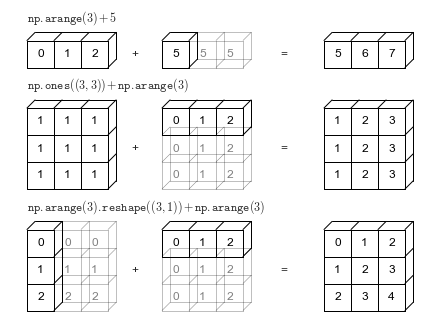

In [ ]:
np.arange(3) + 5

array([5, 6, 7])

In [ ]:
np.ones((3, 3)) + np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [ ]:
np.arange(3).reshape((3, 1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

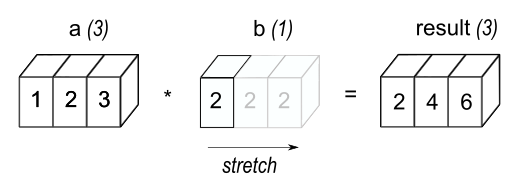

In [ ]:
np.array([1, 2, 3]) * 2

array([2, 4, 6])

### Алгоритм работы

При работе с двумя массивами NumPy сравнивает их формы поэлементно. Он начинает с последнего (т.е. **c самого правого**) измерения и идет влево.

Два измерения совместимы, когда
* они равны, или
* один из них 1.

Если эти условия не выполняются, выдается исключение, указывающее на то, что массивы имеют несовместимые формы.

Входные массивы **не обязательно** должны иметь одинаковое количество измерений. Результирующий массив будет иметь такое же количество измерений, как и входной массив с наибольшим количеством измерений, где размер каждого измерения является наибольшим размером соответствующего измерения среди входных массивов.

Обратите внимание, что предполагается, что **отсутствующие измерения имеют размер один**.

In [ ]:
arr_1 = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 1, 2, 3]])
print(f"shape arr_1 is: {arr_1.shape}")
arr_2 = np.array([4, 5, 6])
print(f"shape arr_2 is: {arr_2.shape}")
print(arr_1 + arr_2)

shape arr_1 is: (3, 4)
shape arr_2 is: (3,)


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

Разберем примеры, когда какие размерности подлежат успешному broadcasting:



```
A      (3d array): 256 x 256 x 3
B      (1d array):             3
Result (3d array): 256 x 256 x 3
```
```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```
```
A      (2d array):  5 x 4
B      (1d array):      1
Result (2d array):  5 x 4
```
```
A      (2d array):  5 x 4
B      (1d array):      4
Result (2d array):  5 x 4
```
```
A      (3d array):  15 x 3 x 5
B      (3d array):  15 x 1 x 5
Result (3d array):  15 x 3 x 5
```
```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 5
Result (3d array):  15 x 3 x 5
```
```
A      (3d array):  15 x 3 x 5
B      (2d array):       3 x 1
Result (3d array):  15 x 3 x 5
```



А теперь примеры размерностей, которые не подлежат broadcasting:

```
A      (1d array):  3
B      (1d array):  4 # Ошибка, 3 != 4
```
```
A      (2d array):      2 x 1
B      (3d array):  8 x 4 x 3 # Ошибка, 2 != 4
```

Иногда бывает полезно вручную добавить измерение к np.array, например:

In [ ]:
np.array([1, 2]) +

In [ ]:
x = np.array([1, 2])
y_1 = np.expand_dims(x, axis=0)
y_2 = np.expand_dims(x, axis=1)
y_3 = np.expand_dims(x, axis=(0, 1))
y_4 = np.expand_dims(x, axis=(2, 1))
y_5 = np.expand_dims(x, axis=(6, 5, 4, 3, 2, 1))

print(x.shape)
print(y_1.shape)
print(y_2.shape)
print(y_3.shape)
print(y_4.shape)
print(y_5.shape)


(2,)
(1, 2)
(2, 1)
(1, 1, 2)
(2, 1, 1)
(2, 1, 1, 1, 1, 1, 1)


Например, нам нужно прибавить к столбцам одномерный массив:

In [ ]:
data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])

weights = np.array([10, 20, 30])
data + weights

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
data + np.expand_dims(weights, axis=1)

array([[11, 12, 13, 14],
       [25, 26, 27, 28],
       [39, 40, 41, 42]])

Также это можно сделать с помощью reshape:

In [ ]:
data + weights.reshape(3, 1)

array([[11, 12, 13, 14],
       [25, 26, 27, 28],
       [39, 40, 41, 42]])

### Задачи

Определите, что выведет программа, и какая размерность ответа будет в случае успешной работы:

In [ ]:
array_2d = np.array([[1, 2, 3, 4],
                     [5, 6, 7, 8],
                     [9, 10, 11, 12]])

vector = np.array([10, 20, 30, 40])

result = array_2d + vector
print(result.shape)
print(result)

(3, 4)
[[11 22 33 44]
 [15 26 37 48]
 [19 30 41 52]]


Определите, что выведет программа, и какая размерность ответа будет в случае успешной работы:

In [ ]:
array_2d = np.array([[1, 2],
                     [3, 4],
                     [5, 6]])

array_1d = np.array([[10, 20],
                    [30, 40]])

result = array_2d + array_1d
print(result.shape)
print(result)

ValueError: operands could not be broadcast together with shapes (3,2) (2,2) 

Определите, что выведет программа, и какая размерность ответа будет в случае успешной работы:

In [ ]:
array_3d = np.array([[[1, 2, 3, 4],
                      [5, 6, 7, 8]],
                     [[9, 10, 11, 12],
                      [13, 14, 15, 16]],
                     [[17, 18, 19, 20],
                      [21, 22, 23, 24]]])

vector = np.array([1, 1, 1, 2])

result = array_3d * vector
print(result.shape)
print(result)

(3, 2, 4)
[[[ 1  2  3  8]
  [ 5  6  7 16]]

 [[ 9 10 11 24]
  [13 14 15 32]]

 [[17 18 19 40]
  [21 22 23 48]]]


Даны 2 массива, сделайте так, чтобы их можно было перемножить:

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6, 7, 8, 9])
print(x * y)

ValueError: operands could not be broadcast together with shapes (3,) (6,) 

#### Решение

In [ ]:
x_reshaped = x.reshape(3, 1)
x_reshaped * y

array([[ 4,  5,  6,  7,  8,  9],
       [ 8, 10, 12, 14, 16, 18],
       [12, 15, 18, 21, 24, 27]])

# 9. Разные полезные фукнции

## np.eye

Описание: Создает единичную матрицу заданного размера.

Документация: [numpy.eye](https://numpy.org/doc/stable/reference/generated/numpy.eye.html)

In [ ]:
np.eye(3)  # Создает единичную матрицу 3x3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## np.logspace

Описание: Генерирует массив чисел, распределенных по логарифмической шкале.

Документация: [numpy.logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)

In [ ]:
np.logspace(1, 3, num=5)  # 5 значений от 10^1 до 10^3

array([  10.        ,   31.6227766 ,  100.        ,  316.22776602,
       1000.        ])

## np.random.choice

Описание: Возвращает случайные элементы из заданного одномерного массива.

Документация: [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [ ]:
np.random.choice([1, 2, 3, 4, 5], size=3)  # Случайный выбор из списка с повторениями

array([3, 3, 4])

In [ ]:
np.random.choice([1, 2, 3, 4, 5], replace=False, size=(2, 2))  # Случайный выбор из списка без повторений

array([[4, 3],
       [1, 5]])

## np.cumsum

Описание: Возвращает кумулятивную сумму массива по заданной оси.

Документация: [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

In [ ]:
np.cumsum(np.array([1, 2, 3, 4])) # Кумулятивная сумма

array([ 1,  3,  6, 10])

In [ ]:
np.cumsum(np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8]]))

array([ 1,  3,  6, 10, 15, 21, 28, 36])

In [ ]:
np.cumsum(np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8]]), axis=1) # Кумулятивная сумма по строкам

array([[ 1,  3,  6, 10],
       [ 5, 11, 18, 26]])

In [ ]:
np.cumsum(np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8]]), axis=0) # Кумулятивная сумма по столбцам

array([[ 1,  2,  3,  4],
       [ 6,  8, 10, 12]])

## np.meshgrid

Описание: Генерирует координатные матрицы для векторов x и y.

Документация: [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

In [ ]:
x = np.array([1, 2])
y = np.array([4])
X, Y = np.meshgrid(x, y)
print("X:\n", X)
print("Y:\n", Y)

X:
 [[1 2]]
Y:
 [[4 4]]


In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
X, Y = np.meshgrid(x, y)
print("X:\n", X)
print("Y:\n", Y)

X:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Y:
 [[4 4 4]
 [5 5 5]
 [6 6 6]]


## Universal Functions (ufunc)

Описание: Универсальные функции (ufunc) выполняют поэлементные операции на массивах.

Документация: [numpy.ufunc](https://numpy.org/doc/stable/reference/ufuncs.html)

Разные [примеры](https://www.w3schools.com/python/numpy/numpy_ufunc.asp) использования

In [ ]:
np.square(np.array([1, 2, 3]))  # Возводит в квадрат

array([1, 4, 9])

In [ ]:
arr = np.array([20, 8, 32, 36, 16])
np.gcd.reduce(arr) # Находит НОД

4

In [ ]:
arr = np.array([10, 15, 25, 5])
np.diff(arr) # Находит разницу между соседними элементами

array([  5,  10, -20])

In [ ]:
np.prod(np.array([1, 2, 3, 4])) # Находит произведение всех элементов

24

## np.put

Описание: Вставляет значения в указанные индексы входного массива.

Документация: [numpy.put](https://numpy.org/doc/stable/reference/generated/numpy.put.html)

In [ ]:
array = np.array([10, 20, 30, 40])
np.put(array, [1, 3], [99, 88])  # Заменяет значения по индексам
array

array([10, 99, 30, 88])

## np.sort

Описание: Сортирует массив вдоль указанной оси.

Документация: [numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)

In [ ]:
array = np.array([3, 1, 2])
sorted_array = np.sort(array) # Сортировка по строке
sorted_array

array([1, 2, 3])

In [ ]:
array = np.array([[3, 1, 2],[5, 9, 1]])
sorted_array = np.sort(array, axis=1) # Сортировка по строкам
sorted_array

array([[1, 2, 3],
       [1, 5, 9]])

In [ ]:
array = np.array([[3, 1, 2],[5, 9, 1]])
sorted_array = np.sort(array, axis=0) # Сортировка по столбцам
sorted_array

array([[3, 1, 1],
       [5, 9, 2]])

## np.argsort

Описание: Возвращает индексы, которые упорядочивают массив.

Документация: [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [ ]:
array = np.array([3, 1, 2])
sorted_indices = np.argsort(array)  # Индексы отсортированного массива
print(sorted_indices)

[1 2 0]


In [ ]:
array = np.array([[3, 1, 2],[5, 9, 1]])
sorted_indices = np.argsort(array)  # Индексы отсортированного массива по строкам
print(sorted_indices)

[[1 2 0]
 [2 0 1]]


In [ ]:
array = np.array([[3, 1, 2],[5, 9, 1]])
sorted_indices = np.argsort(array, axis=0)  # Индексы отсортированного массива по столбцам
print(sorted_indices)

[[0 0 1]
 [1 1 0]]


## np.split

Описание: Делит массив на заданное количество частей по указанной оси.

Документация: [numpy.split](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [ ]:
array = np.array([1, 2, 3, 4, 5, 6])
split_array = np.split(array, 3)  # Делит на 3 части по строкам
print(split_array)

[array([1, 2]), array([3, 4]), array([5, 6])]


In [ ]:
array = np.array([[1, 2, 3],
                  [4, 5, 6]])
split_array = np.split(array, 3, axis=1)  # Делит на 3 части по столбцам
print(split_array)

[array([[1],
       [4]]), array([[2],
       [5]]), array([[3],
       [6]])]
